In [1]:
######################
# Recording the data #
######################

import time, datetime
import board, busio
import picamera
import numpy as np
import pandas as pd
import adafruit_mlx90640
from IPython import display
from subprocess import call


# init the i2c and mlx90640
i2c = busio.I2C(board.SCL, board.SDA, frequency=800000)
mlx = adafruit_mlx90640.MLX90640(i2c)
mlx.refresh_rate = adafruit_mlx90640.RefreshRate.REFRESH_16_HZ

# init csv file
file_create_time = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
file_header = ['P{:03d}'.format(i) for i in range(768)]
file_header = ['Time', 'RT'] + file_header

# init dataframe with header
df = pd.DataFrame(columns=file_header)

data = list()
count = 0
frame = np.zeros(768)

while True:
    try:
        local_time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-2]
        mlx.getFrame(frame)
        count += 1
    except ValueError as e:
        print(e)
        continue

    res = np.around(frame, 2).tolist()
    _row = [local_time, 0] + res
    data.append(_row)

    if count > 10:
        break

df = pd.DataFrame(data, columns=file_header)
df.to_csv("test.csv", index=False, header=True)


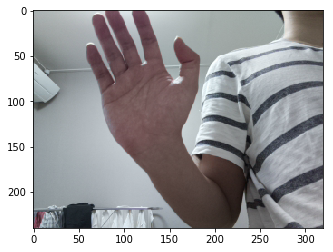

In [20]:
# -*- coding: utf-8 -*-
import time
import picamera
import picamera.array
import numpy as np
from  matplotlib import pyplot as plt

# image = np.empty((240 * 320 * 3,), dtype=np.uint8)

with picamera.PiCamera() as camera:
    camera.resolution = (320, 240)
    camera.framerate = 24
    camera.vflip = True
    # camera.capture(image, 'rgb')
    # image = image.reshape((240, 320, 3))
    # plt.imshow(image)
    # plt.show()
    
    with picamera.array.PiRGBArray(camera) as stream:
        camera.capture(stream, format='rgb')
        image = stream.array

        plt.imshow(image)
        plt.show()


#     camera.start_recording('test.h264')
#     camera.wait_recording(5)
#     camera.stop_recording()
#     camera.close()

# convert = "MP4Box -add test.h264 test.mp4" # defining convert
# call ([convert], shell=True) # executing convert using call

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    # cv2.imshow('frame', frame)
    im2 = frame[:,:,::-1]
    plt.imshow(im2)
    plt.show()

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()